# Grupo: Leila Aparecida da Silva e Leticia Yumi Katsurada


# News Category Dataset
(https://www.kaggle.com/rmisra/news-category-dataset) 

![imagem](http://s3.amazonaws.com/s3.wben.com/styles/nts_image_cover_tall_775x425/s3/s3fs-public/breaking%20graphic%20deamstime.jpg?itok=4AF8dIsv&c=b6edab9350f457edd2df68f0c7623b9c)

### Atributos:
`authors`: autores que publicaram o artigo  
`date`: data em que o artigo foi publicado  
`headline:` manchete da notícia  
`article_link`: link para o artigo original da notícia 
`short_description`: uma descrição curta sobre o artigo  
`category`: categoria da notícia (atributo de classificação)  



## Etapa 1 - Escolha do conjunto de Dados

**✓ Relevante**: Classificação de notícias e de texto em geral é útil e aplicável em vários contextos  
**✓ Desafiador**: É necessário tratar os dados de texto antes de utilizar   
**✓ Complexo**: Trabalhar com classificação por meio de textos, gera um conjunto de dados mais complexo do que se fosse um categórico ou numérico.   

## Importação de bibliotecas utilizadas

In [1]:
import pandas as pd
import os 
import json
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# Estudo do conjunto de Dados

## Leitura do Dataset

In [2]:
df = pd.read_json('News_Category_Dataset.json', lines=True)

## Visualização

In [3]:
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


## Quantidade de linhas e colunas no DataFrame original

In [4]:
df.shape

(124989, 6)

In [5]:
df.count() #dados não-nulos

authors              124989
category             124989
date                 124989
headline             124989
link                 124989
short_description    124989
dtype: int64

In [6]:
df.describe()
#df.mean()

,authors,category,date,headline,link,short_description
count,124989,124989,124989,124989,124989,124989
unique,19250,31,1498,124560,124964,103905
top,,POLITICS,2017-01-27 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://www.nytim...,
freq,14151,32739,100,90,2,19590
first,NaN,NaN,2014-04-18 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


# Solucionar problemas de atributos

## Há registros com dados faltantes! (NaN)
### Vamos eliminá-los 

In [7]:
#eliminar tuplas com valores faltantes
df = df[~(df['authors'].isin(['']))]
df = df[~(df['category'].isin(['']))]
df = df[~(df['headline'].isin(['']))]
df = df[~(df['short_description'].isin(['']))]

df.shape

(95707, 6)

### De 124989 para 95707 tuplas

## Seleção de atributos
#### Os atributos `link` e `date` não são, à princípio, úteis na classificação. Então vamos removê-los do Dataset.

Obs: `link` poderia ser usado em uma análise mais profunda para ler o texto completo da notícia diretamente do site, e em alguns casos `date` poderia ser relevante, como época de eleições onde há mais notícias sobre política. 


In [8]:
#elimina os atributos date e link
del df['date']
del df['link']

## Redução de atributos
`headline` e `short_description` são ambos textos com informações sobre as notícias, então vamos agrupá-los para facilitar a criação do modelo.

In [9]:
#agrupa headline e short description
df["headline"] = df["short_description"] + ' ' + df["headline"]

#elimina o description
del df['short_description']

## Atributos após seleção e redução

In [10]:
print(df.columns)
df.head(5)

Index(['authors', 'category', 'headline'], dtype='object')


,authors,category,headline
0,Melissa Jeltsen,CRIME,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...
2,Ron Dicker,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."


# Dataset com muitas categorias possíveis (31), classificação complexa

Vamos reduzir para uma classificação binária, delimitando o Dataset para tuplas em que `category` é `CRIME`ou `COMEDY`.

Optou-se por estas duas categorias por possuírem uma quantidade semelhante de tuplas e por geralmente utilizarem termos mais distintos entre si.



In [11]:
#restringe o dataset para registros em que a categoria é crime ou comédia
df = df.loc[df['category'].isin(['CRIME', 'COMEDY'])]
df.category.head(10)

0      CRIME
32     CRIME
37    COMEDY
38    COMEDY
39    COMEDY
40     CRIME
41    COMEDY
42     CRIME
78    COMEDY
85    COMEDY
Name: category, dtype: object

In [12]:
df.count() #quantidade de tuplas entre crime e comedy

authors     4909
category    4909
headline    4909
dtype: int64

# Classificação

In [13]:
#Coloca os dados em ordem aleatória
dfrandom = (df.sample(n=4909, replace=False)) 

### Aplica hold out

In [14]:
## Aplicando hold out 1/2 e 1/2
train_df = dfrandom.iloc[:2454,:] 
test_df = dfrandom.iloc[2454:,:]

### Salva dataset de teste para comparação posterior

In [15]:
#dataset de teste auxiliar para depois comparar
aux_test_df = pd.DataFrame()
aux_test_df['category'] = test_df['category']
aux_test_df.head(5)

,category
74867,CRIME
48608,CRIME
16617,COMEDY
2646,COMEDY
11837,CRIME


## Distribuição do Dataset de teste entre as categorias

In [16]:
count_by_category = train_df.groupby('category').count().headline
count_by_category

category
COMEDY    1634
CRIME      820
Name: headline, dtype: int64

## Classificador trivial
Um classificador trivial seria definir que a notícia a ser classificada pertence à classe majoritária (nesse caso COMEDY). O que, considerando o Dataset de treino, teria uma probabilidade de acerto de 0.65%. Assim, nosso classificador precisa necessariamente ser melhor que isso. 


In [17]:
#classificador trivial
count_by_category.max()/count_by_category.sum()

0.6658516707416463

## Bag of words
O primeiro passo que vamos fazer é transformar o texto de cada linha em uma representação de Bag of Words. Isso vai incluir o processo de tokenização. Vamos pedir para que o CountVectorizer "aprenda" o vocabulário do nosso texto. Isso vai fazer com que ele seja capaz de trabalhar com Bag of Words.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow.fit(train_df.append(train_df)['headline'])
#lembrando que headline = headline + short_description

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
#primeira amostra do dataset de treino
print(train_df.iloc[0].headline)

The device contains sealed sources of radioactive material that police warned could be a danger to the public if manipulated. Radioactive Device Stolen From Connecticut Car Has Been Found At A Pawn Shop


In [20]:
print("Tamanho do Vocabulario aprendido:", len(bow.vocabulary_), "palavras")


Tamanho do Vocabulario aprendido: 9562 palavras


## Aplicando o Bag of words

In [21]:
#Resultado: matriz em que cada linha é uma amostra e cada coluna representa
#o numero  de vezes que aquela palavra apareceu

train_X_bow = bow.transform(train_df['headline'])
train_X_bow

<2454x9562 sparse matrix of type '<class 'numpy.int64'>'
	with 51928 stored elements in Compressed Sparse Row format>

### Isso gera uma matriz esparsa de 2454 x 9485 (tuplas x palavras) - Muito grande para exibir!   
### Vamos exibir apenas a primeira linha:

In [22]:
#primeira linha da matriz esparsa
x_bow_0 = train_X_bow[0].toarray().reshape(-1)
x_bow_0

array([0, 0, 0, ..., 0, 0, 0])

### Reordena em ordem decrescente para saber as palavras mais frequentes


In [23]:
#reordena em ordem decrescente para saber as palavras mais frequentes
idx = np.argsort(-x_bow_0)[:10]
print(idx)
print(x_bow_0[idx])
print(np.array(bow.get_feature_names())[idx])

[2437 6740 8524 3427 6113 1971 1897 5219 7427 9216]
[2 2 2 1 1 1 1 1 1 1]
['device' 'radioactive' 'the' 'found' 'pawn' 'could' 'contains' 'material'
 'sealed' 'warned']


# Porém...
Palavras comuns em todos os textos, como "for", "the", "who"


# Solução: TF-IDF
### Term Frequency - Inverse Document Frequency

Técnica para classificar palavras por ordem de relevância, 

## TF-IDF
### Term Frequency - Inverse Document Frequency

Técnica para classificar palavras por ordem de relevância, seguindo o princípio de que quanto menos frequente uma palavra aparece em todo o Dataset, mais relevante ela é. 

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf.fit(train_X_bow)

#transformar o bag of words
train_X_tfidf = tfidf.transform(train_X_bow)
train_X_tfidf

#conteudo do bag of words (primeira posição)
x_tfidf_0 = train_X_tfidf[0].toarray().reshape(-1)
x_tfidf_0

#ordena de mais frequente para menos frequente (na primeira posição)
idx = np.argsort(-x_tfidf_0)[:20]
print(idx)
print(x_tfidf_0[idx])
print(np.array(bow.get_feature_names())[idx])

[6740 2437 6113 5219 5148 7427 1897 9216 7900 1863 2195 7618 8105 6631
 1370 1971 3427  858 4218 3915]
[0.43056063 0.38322699 0.22660581 0.22660581 0.22660581 0.22660581
 0.21528032 0.20724475 0.20724475 0.20101188 0.20101188 0.18459375
 0.18165081 0.17032532 0.14292868 0.13842413 0.12894097 0.12122463
 0.11247587 0.10438168]
['radioactive' 'device' 'pawn' 'material' 'manipulated' 'sealed'
 'contains' 'warned' 'sources' 'connecticut' 'danger' 'shop' 'stolen'
 'public' 'car' 'could' 'found' 'been' 'if' 'has']


### LabelEncoding do Target
Converte as categorias para valores numéricos:

Comedy = 1 e Crime = 0

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['category'])
le.classes_


array(['COMEDY', 'CRIME'], dtype=object)

In [26]:
#Converte a coluna category do dataset para numérico, sendo 0 comedy e 1 crime
train_y = le.transform(train_df['category'])
train_y

array([1, 0, 0, ..., 1, 1, 0])

## Treinando Modelo
### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1.0)

### Convertendo para Bag of words

In [28]:
train_X_bow = bow.transform(train_df['headline'])
train_X_bow

<2454x9562 sparse matrix of type '<class 'numpy.int64'>'
	with 51928 stored elements in Compressed Sparse Row format>

### Aplicando TF-IDF


In [29]:
train_X_tfidf = tfidf.transform(train_X_bow)
train_X_tfidf

<2454x9562 sparse matrix of type '<class 'numpy.float64'>'
	with 51928 stored elements in Compressed Sparse Row format>

### Para treinar, passar as características e os targets


In [30]:
nb.fit(train_X_tfidf, train_y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predição usando o próprio dataset de treino


In [31]:
y_pred = nb.predict(train_X_tfidf)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [32]:
#Avaliando usando o dataset de treino
from sklearn.metrics import accuracy_score
print("Acurácia: ", accuracy_score(train_y, y_pred))

Acurácia:  0.9515077424612877


Ao testar com o Dataset de treino, é óbvio que o modelo tem uma alta precisão. Agora vamos aplicar o modelo no Dataset de teste:

## Cross Validation

Dataset de teste auxiliar reservado anteriormente:

In [33]:
aux_test_df.head()

,category
74867,CRIME
48608,CRIME
16617,COMEDY
2646,COMEDY
11837,CRIME


In [34]:
#no arquivo de teste auxiliar
#Converte a coluna category para numérico, sendo 0 comedy e 1 crime
test_y = le.transform(aux_test_df['category'])
test_y

array([1, 1, 0, ..., 0, 0, 0])

## Validação K-Fold

In [35]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42)



#convertendo para bag of words
test_X_bow = bow.transform(test_df['headline'])

#aplicando TF-IDF
test_X_tfidf = tfidf.transform(test_X_bow)
test_X_tfidf

#conteudo do bag of words (primeira posição)
x_tfidf_0 = test_X_tfidf[0].toarray().reshape(-1)
x_tfidf_0

y_pred = cross_val_predict(MultinomialNB(alpha=1.0),
                           test_X_tfidf,
                           test_y,
                           cv=cv)
print("Acurácia do modelo aplicado ao conjunto de teste:", 
      accuracy_score(test_y, y_pred))


Acurácia do modelo aplicado ao conjunto de teste: 0.9107942973523422


## Log Loss

Uma outra métrica bem conhecida é o Log Loss (Logarithmic Loss). Usada em problemas de classificação, esta métrica penaliza os modelos com classificações falsas. 

Quanto **menor** o Log Loss, **melhor**.



In [36]:
#outra metrica: log_loss
y_pred_proba = cross_val_predict(MultinomialNB(alpha=1.0),
                                 test_X_tfidf,
                                 test_y,
                                 cv=cv,
                                 method='predict_proba')
from sklearn.metrics import log_loss
log_loss(test_y, y_pred_proba)

0.2297091317375838

### Predict ProbA
Gera uma tabela de probabilidades de ser de cada uma das duas classes

In [37]:
y_pred_proba = nb.predict_proba(test_X_tfidf)
y_pred_proba

array([[0.31274474, 0.68725526],
       [0.15977436, 0.84022564],
       [0.96079803, 0.03920197],
       ...,
       [0.9720522 , 0.0279478 ],
       [0.93461213, 0.06538787],
       [0.88393173, 0.11606827]])

In [38]:
colunas = [
    'COMEDY',
    'CRIME',
]

precisao_df = pd.DataFrame(columns=colunas)

precisao_df['COMEDY'] = y_pred_proba[:,0]
precisao_df['CRIME'] = y_pred_proba[:,1]

precisao_df.head(10)

,COMEDY,CRIME
0,0.312745,0.687255
1,0.159774,0.840226
2,0.960798,0.039202
3,0.974406,0.025594
4,0.691548,0.308452
5,0.968875,0.031125
6,0.674736,0.325264
7,0.947858,0.052142
8,0.703655,0.296345
9,0.935320,0.064680


In [39]:
#classifica entre comedy ou crime

def acha_classe(registro):
    if registro['COMEDY'] > registro['CRIME']:
        return 'COMEDY'
    elif registro['COMEDY'] < registro['CRIME']:
        return 'CRIME'
    else:
        return 'UNKNOWN'
    
precisao_df['category'] = precisao_df.apply(acha_classe, axis=1)

precisao_df.head(10)

,COMEDY,CRIME,category
0,0.312745,0.687255,CRIME
1,0.159774,0.840226,CRIME
2,0.960798,0.039202,COMEDY
3,0.974406,0.025594,COMEDY
4,0.691548,0.308452,COMEDY
5,0.968875,0.031125,COMEDY
6,0.674736,0.325264,COMEDY
7,0.947858,0.052142,COMEDY
8,0.703655,0.296345,COMEDY
9,0.935320,0.064680,COMEDY


In [40]:
aux_test_df.head(10)

,category
74867,CRIME
48608,CRIME
16617,COMEDY
2646,COMEDY
11837,CRIME
58560,COMEDY
1031,COMEDY
50462,COMEDY
86158,COMEDY
22361,COMEDY


### Resultados em Gráficos
O primeiro mostra a dispersão dos resultados previstos e reais. O segundo a proporção de acertos e erros.

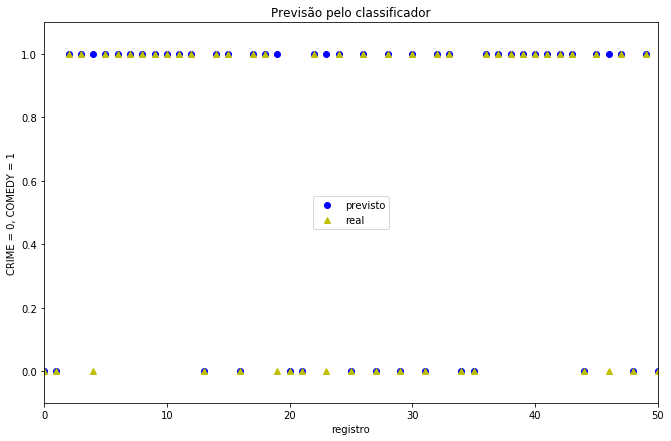

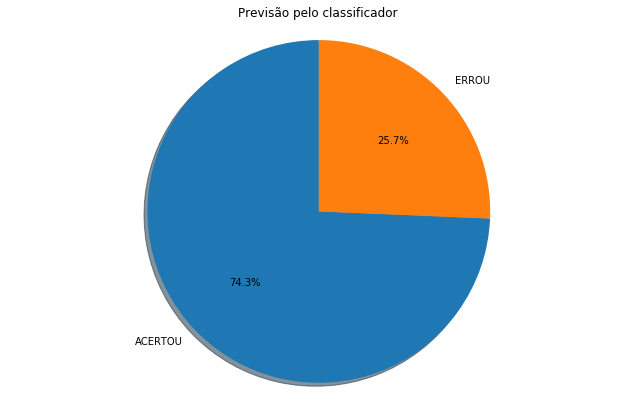

In [44]:
# Comparando a prevista com a real, classificando a categoria como binario
def acha_precisao_classe(precisao_df):
    if precisao_df['category'] == 'CRIME':
        return 0
    else:
        return 1
    
precisao_df['binario'] = precisao_df.apply(acha_precisao_classe, axis=1)

def acha_precisao_classe1(aux_test_df):
    if aux_test_df['category'] == 'CRIME':
        return 0
    else:
        return 1
    
aux_test_df['binario_real'] = aux_test_df.apply(acha_precisao_classe1, axis=1)


#Grafico dispersão
plt.rcParams['figure.figsize'] = (11,7)
x = np.array(range(len(precisao_df)))
plt.plot(x, precisao_df['binario'], 'bo', label=u"previsto") # green bolinha
plt.plot(x, aux_test_df['binario_real'], 'y^', label="real")
plt.legend(loc='center')

plt.axis([0, 50, -0.1, 1.1])
plt.title("Previsão pelo classificador")

plt.xlabel("registro")
plt.ylabel("CRIME = 0, COMEDY = 1")
plt.savefig('dispersao.jpg')  
plt.show()

def acha_precisao_classe2(precisao_df):
    if aux_test_df['binario_real'] == precisao_df['binario']:
        return 1
    else:
        return 0
      
precisao_df['acertou'] = precisao_df.apply(acha_precisao_classe1, axis=1)

acertou = precisao_df.groupby(by='acertou')['acertou'].count().sort_values(ascending=False)

#Grafico acertos
labels = 'ACERTOU', 'ERROU'
sizes = [acertou[1], acertou[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Previsão pelo classificador")
plt.savefig('pie.jpg')  
plt.show()
